In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
crime = pd.read_csv('data\crime.csv', index_col='communityname')
crime.head()

,state,county,community,fold,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
Lakewoodcity,8,NaN,NaN,1,0.19,0.33,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.5,0.32,0.14,0.20
Tukwilacity,53,NaN,NaN,1,0.00,0.16,0.26,0.59,0.35,0.27,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,0.00,NaN,0.67
Aberdeentown,24,NaN,NaN,1,0.00,0.42,0.39,0.47,0.28,0.32,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,0.00,NaN,0.43
Willingborotownship,34,5.0,81440.0,1,0.04,0.77,0.51,0.50,0.34,0.21,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,0.00,NaN,0.12
Bethlehemtownship,42,95.0,6096.0,1,0.01,0.55,0.38,0.38,0.23,0.36,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
crime.shape

(1994, 111)

In [4]:
nan_per_col = crime.isna().sum()
missing_values = nan_per_col[nan_per_col>0]

In [5]:
crime.shape

(1994, 111)

In [6]:
cols_to_remove = missing_values.index
crime.drop(cols_to_remove, axis=1, inplace=True)

In [7]:
crime.shape

(1994, 93)

In [8]:
non_predictive = ['state', 'fold']
crime.drop(non_predictive, axis=1, inplace=True)

In [9]:
crime.shape

(1994, 91)

In [10]:
top_corr_features = crime.corr().loc['ViolentCrimesPerPop'].apply(np.abs).sort_values(ascending=False).index[1:11]
top_corr_features

Index(['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'pctWInvInc', 'pctWPubAsst', 'FemalePctDiv',
       'TotalPctDiv', 'PctPersOwnOccup'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
target_name = 'ViolentCrimesPerPop'
x = crime[top_corr_features]
y = crime[target_name]
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=12)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [13]:
model_mean = pd.DataFrame(index=['MSE', 'RMSE', 'MAE'], columns=['NULL', 'MLR'])
model_r = pd.DataFrame(index=['R2', 'explained_variance'], columns=['NULL', 'MLR'])

In [14]:
y_pred_null = y_train.mean()
y_pred_null

0.23799373040752353

In [15]:
model_mean.loc['MSE', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true= y_test)

In [16]:
from sklearn.linear_model import LinearRegression

Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train, y_train)
y_pred = Linear_Regression.predict(x_test)

In [17]:
model_mean.loc['MSE', 'MLR'] = mean_squared_error(y_pred=y_pred, y_true=y_test)
model_mean.loc['RMSE', 'MLR'] = mean_squared_error(y_pred=y_pred, y_true=y_test, squared=False)
model_mean.loc['MAE', 'MLR'] = mean_absolute_error(y_pred=y_pred, y_true=y_test)
model_mean.loc['R2', 'MLR'] = r2_score(y_pred=y_pred, y_true=y_test)
model_mean.loc['explained_variance', 'MLR'] = explained_variance_score(y_pred=y_pred, y_true=y_test)

Text(0.5, 1.0, 'Mean error matrics for Regression Models:')

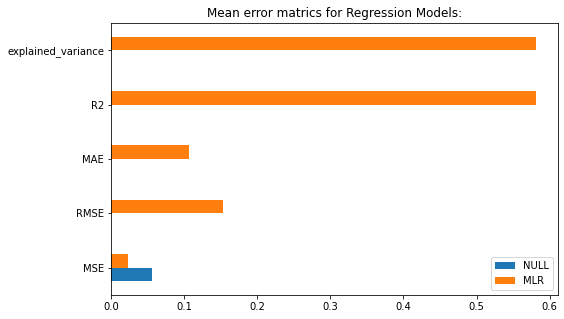

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
model_mean.plot(kind='barh', ax=ax)
ax.set_title('Mean error matrics for Regression Models:')

In [22]:
models = pd.DataFrame(index=['top10_featues_mse', 'full_model_mse'], 
                      columns=['NULL', 'MLR', 'KNN', 'LASSO'])

In [29]:
models

,NULL,MLR,KNN,LASSO
top10_featues_mse,NaN,NaN,0.023737,NaN
full_model_mse,NaN,NaN,NaN,NaN
top10_features_mse,NaN,NaN,NaN,0.055734


""" KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform', metric='euclidean')
knn.fit(x_train, y_train)
models.loc['top10_featues_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), 
                                                   y_true=y_test)

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
models.loc['top10_features_mse', 'LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), y_true=y_test)

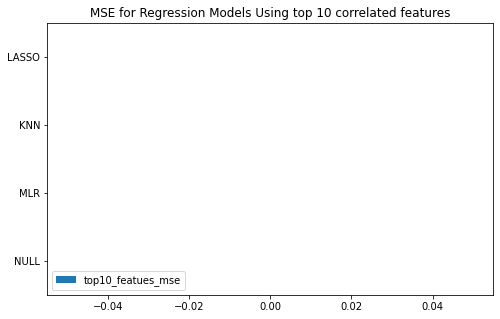

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['top10_featues_mse'].plot(kind='barh', ax=ax)
ax.set_title('MSE for Regression Models Using top 10 correlated features')
ax.legend(loc=3);

In [30]:
target_name = 'ViolentCrimesPerPop'
x = crime.drop('ViolentCrimesPerPop', axis=1)
y = crime[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [31]:
y_pred_null = y_train.mean()
models.loc['full_model_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), 
                                                   y_true=y_test)

In [32]:

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

models.loc['full_model_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test), 
                                                   y_true=y_test)

In [33]:
knn = knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean')
knn.fit(x_train, y_train)
models.loc['full_model_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_test), 
                                                   y_true=y_test)

In [36]:
lasso = Lasso(alpha=0.5)

lasso.fit(x_train, y_train)
models.loc['full_model_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test), 
                                                   y_true=y_test)

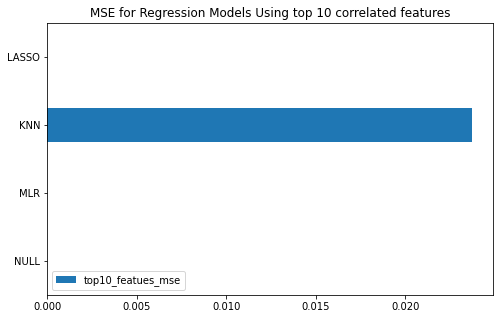

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
models.loc['top10_featues_mse'].plot(kind='barh', ax=ax)
ax.set_title('MSE for Regression Models Using top 10 correlated features')
ax.legend(loc=3);

In [39]:
lasso.coef_
lasso.intercept_

0.23636363636363636